In [17]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from src.util import check_imbalance, get_feature_importance, random_forest_tuning
from sklearn.ensemble import RandomForestClassifier 
from src.viz import plot_corr, plot_histograms

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] == 300

ImportError: cannot import name 'plot_histograms' from 'src.viz' (c:\Users\Asif Sayyed\Documents\GitHub\MachineLearns\python\src\viz.py)

In [2]:
# import and merging the datasets
df1 = pd.read_csv('../data/randomforest_1.csv')
df2 = pd.read_csv('../data/randomforest_2.csv')
display(df1.shape,df2.shape)
df = pd.merge(df1, df2, on='ID', how='inner',
               validate="many_to_many")
display(df.shape)
# converting column names into lowercase
df.columns = df.columns.str.lower()

(5000, 8)

(5000, 7)

(5000, 14)

In [3]:
# glancing at the dataset
display(df.sample(5))

,id,age,customersince,highestspend,zipcode,hiddenscore,monthlyaveragespend,level,mortgage,security,fixeddepositaccount,internetbanking,creditcard,loanoncard
3105,3106,30,4,23,94122,4,0.3,2,121,0,0,0,0,0.0
2759,2760,59,33,64,95617,3,0.3,2,0,0,0,0,0,0.0
4149,4150,41,15,53,93106,1,0.7,3,0,0,0,1,0,0.0
10,11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
3474,3475,49,24,42,92121,2,0.7,2,0,0,0,1,0,0.0


In [4]:
profile = ProfileReport(df, title='Dataframe Report')
#profile

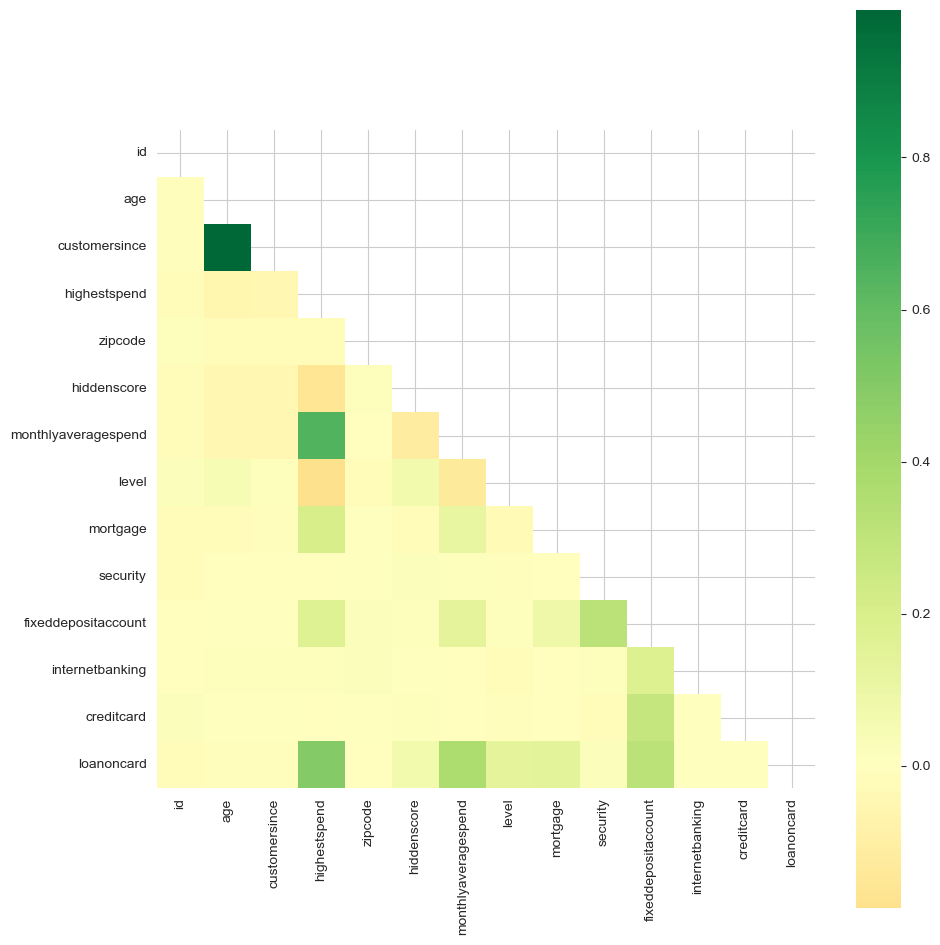

In [5]:
corr = df.corr()
plot_corr(corr, annot=False)

Data Cleaning

In [6]:
# dropping the mising value
df.shape
df.dropna(inplace=True)
df.shape

(4980, 14)

In [7]:
# checking the distribution of target variable
check_imbalance(df,class_column='loanoncard')

Number of true: 480 (9.64%)
Number of false: 4500 (90.361%)


In [8]:
X = df.drop(['loanoncard','zipcode','id'], axis=1)
y = df['loanoncard']

# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [9]:
random_forest = RandomForestClassifier(n_estimators=10, random_state=23)
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=23)

In [10]:
# checking the accuracy score of a classifier on both train and test
print(f"Training set accuracy {random_forest.score(X_train, y_train)}")
print(f"Testing set accuracy {random_forest.score(X_test,y_test)}")

Training set accuracy 0.9991394148020654
Testing set accuracy 0.9825970548862115


In [11]:
n = [100,200,300]
d = [5,10,20,30,40]
l = [300,400,500]
seed = 1

model_performance_df = random_forest_tuning(n=n, d=d, l=l, seed=seed,
                     x_train=X_train,x_test=X_test,
                     y_train=y_train, y_test=y_test)

In [12]:
model_performance_df.head()

,parameter,train_auc,test_auc
0,trees100_maxDepth5_minLeaf300,0.9610,0.9434
1,trees100_maxDepth5_minLeaf400,0.9612,0.9444
2,trees100_maxDepth5_minLeaf500,0.9555,0.9460
3,trees100_maxDepth10_minLeaf300,0.9610,0.9434
4,trees100_maxDepth10_minLeaf400,0.9612,0.9444


2nd round of tuning

In [13]:
n = [50,100,150]
d = [5,6,7,8,9,10,20,30,40]
l = [100,200,225,250,275,300,325,350,375]
seed = 1

model_performance_df = random_forest_tuning(n=n, d=d, l=l, seed=seed,
                     x_train=X_train,x_test=X_test,
                     y_train=y_train, y_test=y_test)

In [14]:
model_performance_df.head()

,parameter,train_auc,test_auc
0,trees50_maxDepth5_minLeaf100,0.9869,0.9749
1,trees50_maxDepth5_minLeaf200,0.9748,0.9538
2,trees50_maxDepth5_minLeaf225,0.9732,0.9534
3,trees50_maxDepth5_minLeaf250,0.9662,0.9467
4,trees50_maxDepth5_minLeaf275,0.9634,0.9457


Best features

In [15]:
random_forest = RandomForestClassifier(n_estimators=50,
                                        max_depth=5,
                                        random_state=1,
                                        min_samples_leaf=100)
random_forest.fit(X_train, y_train)
train_pred = random_forest.predict_proba(X_train)
test_pred = random_forest.predict_proba(X_test)
print("train auc : ",round( roc_auc_score(y_train , train_pred[:,1]),4))
print("test auc : ",round( roc_auc_score(y_test , test_pred[:,1]),4))

train auc :  0.9869
test auc :  0.9749


In [16]:
get_feature_importance(X_train,random_forest,5)

,Name,Imp
2,highestspend,0.478470
4,monthlyaveragespend,0.267936
5,level,0.122108
8,fixeddepositaccount,0.067449
6,mortgage,0.026159
